<a href="https://colab.research.google.com/github/victorbahlangene/Fastai-Docs/blob/main/Tutorials_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q nbdev
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Data block tutorial
Using the data block across all applications

## Building a DataBlock from scratch

In [2]:
from fastai.data.all import *
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [4]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_141.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_127.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_171.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_35.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_2.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_139.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_107.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_100.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_98.jpg')...]

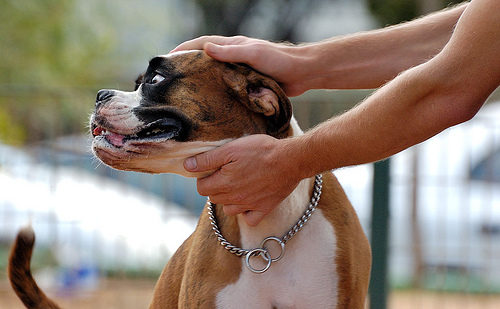

In [7]:
fnames = get_image_files(path/"images")
PILImage.create(fnames[0])

In [11]:
dblock = DataBlock()
dsets = dblock.datasets(fnames)
dsets.train[0]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_129.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_129.jpg'))

In [13]:
doc(dblock.datasets)

In [14]:
doc(DataBlock)

In [15]:
dblock = DataBlock(get_items=get_image_files)
dsets = dblock.datasets(path/"images")
dsets.train[0]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_33.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_33.jpg'))

In [29]:
print(fnames[0],"\n", fnames[0].name, "\n",fnames[0].name[0])

/root/.fastai/data/oxford-iiit-pet/images/boxer_141.jpg 
 boxer_141.jpg 
 b


In [18]:
def label_func(fname):
    return "cat" if fname.name[0].isupper() else "dog"

label_func(fnames[0])

'dog'

In [35]:
set_seed(42)

dblock = DataBlock(get_items=get_image_files,
                   get_y=label_func)

dsets = dblock.datasets(path/"images")
dsets.train[0]

(Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_36.jpg'), 'dog')

In [36]:
set_seed(42)
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(path/"images")
dsets.train[0]

(PILImage mode=RGB size=500x333, TensorCategory(1))

In [37]:
dsets.vocab

['cat', 'dog']

In [38]:
set_seed(42)

dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter())

dsets = dblock.datasets(path/"images")
dsets.train[0]

(PILImage mode=RGB size=500x333, TensorCategory(1))

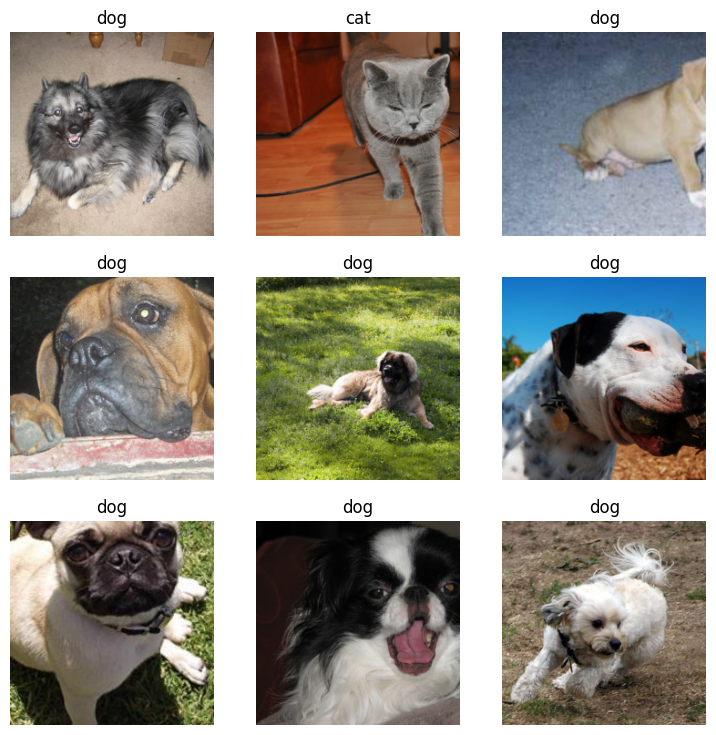

In [39]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224))

dls = dblock.dataloaders(path/"images")
dls.show_batch()

## Image classification

In [40]:
from fastai.vision.all import *

### MNIST (single label)


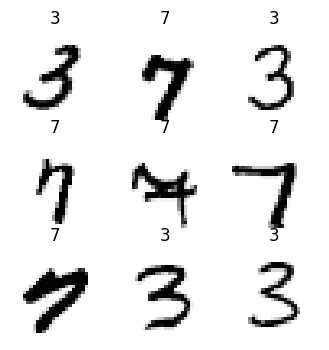

In [42]:
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items=get_image_files,
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)

dls = mnist.dataloaders(untar_data(URLs.MNIST_TINY))
dls.show_batch(max_n=9, figsize=(4,4))

In [43]:
mnist.summary(untar_data(URLs.MNIST_TINY))

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_tiny/train/3/8818.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/mnist_tiny/train/3/8818.png
    applying parent_label gives
      3
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(0))


Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: ToTensor
Sett

### Pets (single label)

In [44]:
doc(Pipeline)

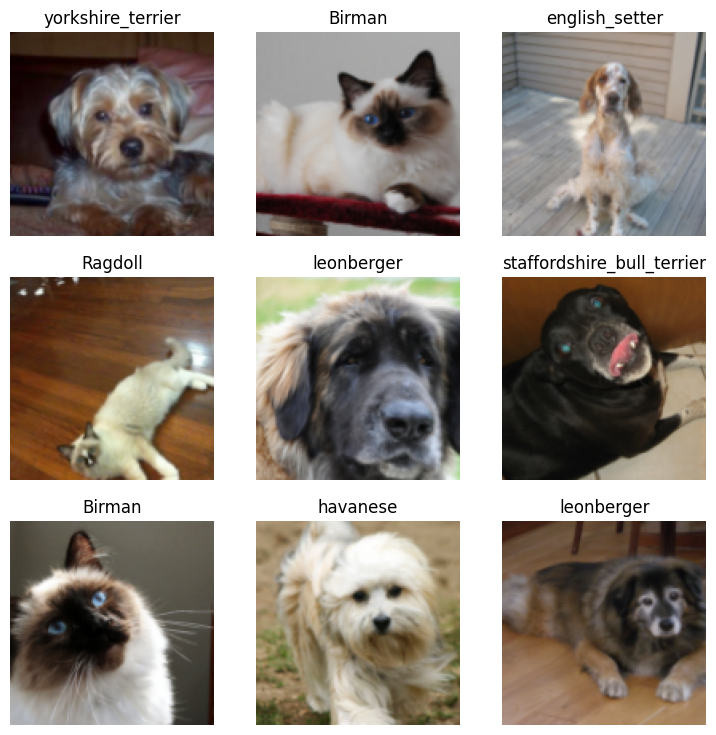

In [47]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=Pipeline([attrgetter("name"), RegexLabeller(pat = r'^(.*)_\d+.jpg$')]),
                 item_tfms=Resize(128),
                 batch_tfms=aug_transforms())

dls = pets.dataloaders(untar_data(URLs.PETS)/"images")
dls.show_batch(max_n=9)

### Pascal (multi-label)

In [48]:
pascal_source = untar_data(URLs.PASCAL_2007)
df = pd.read_csv(pascal_source/"train.csv")

In [49]:
doc(ColSplitter)

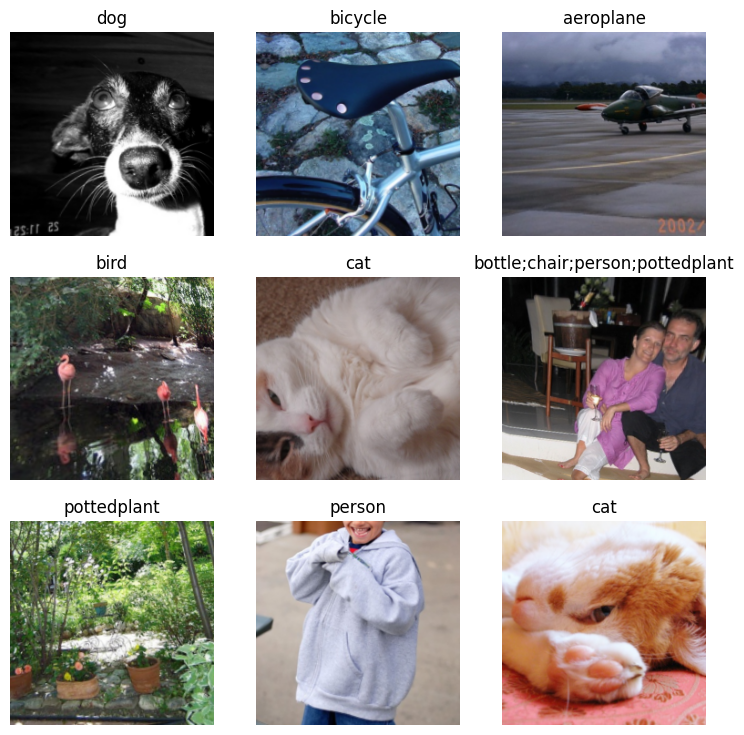

In [50]:
set_seed(42)

pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter(),
                   get_x=ColReader(0, pref=pascal_source/"train"),
                   get_y=ColReader(1, label_delim=' '),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

dls = pascal.dataloaders(df)
dls.show_batch()

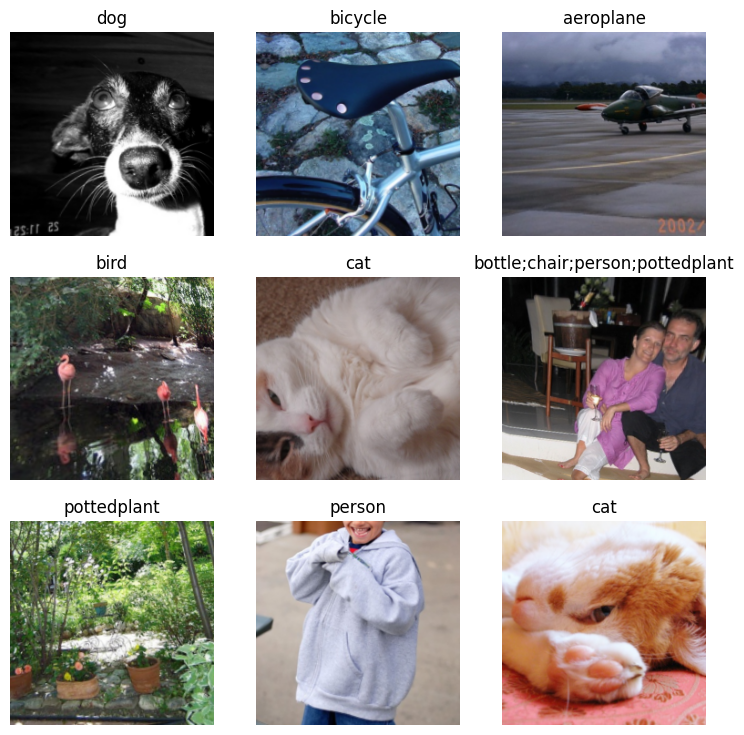

In [51]:
set_seed(42)

pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter(),
                   get_x=lambda x:pascal_source/"train"/f'{x[0]}',
                   get_y=lambda x:x[1].split(' '),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

dls = pascal.dataloaders(df)
dls.show_batch()

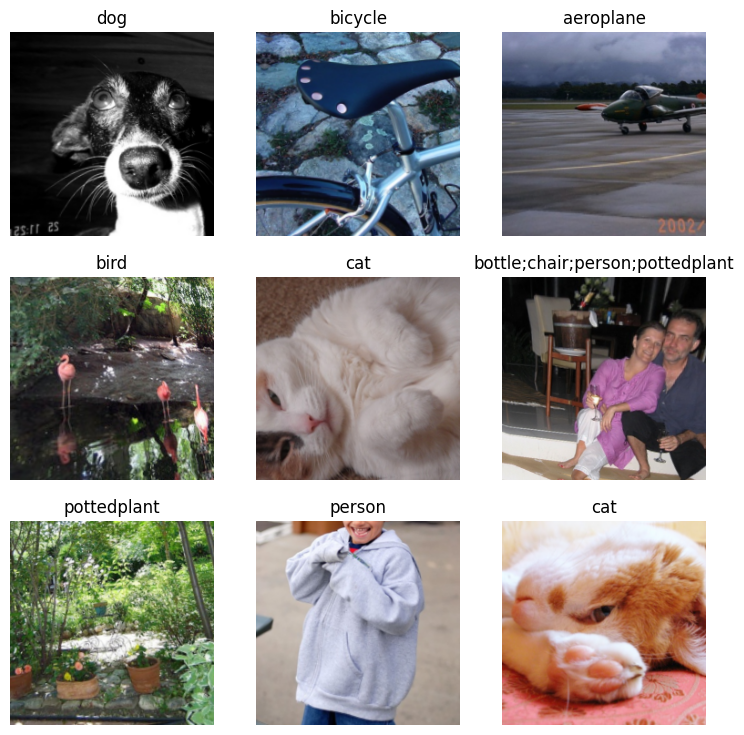

In [52]:
set_seed(42)

pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter(),
                   get_x=lambda o:f'{pascal_source}/train/'+o.fname,
                   get_y=lambda o:o.labels.split(),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

dls = pascal.dataloaders(df)
dls.show_batch()

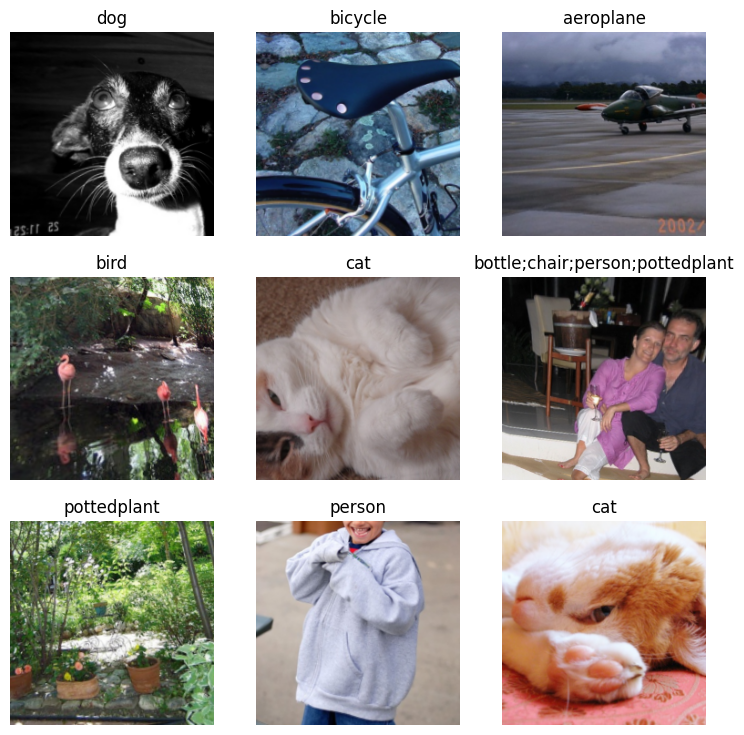

In [53]:
set_seed(42)

def _pascal_items(x): return (
    f'{pascal_source}/train/'+x.fname, x.labels.str.split())
valid_idx = df[df['is_valid']].index.values

pascal = DataBlock.from_columns(blocks=(ImageBlock, MultiCategoryBlock),
                   get_items=_pascal_items,
                   splitter=IndexSplitter(valid_idx),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

dls = pascal.dataloaders(df)
dls.show_batch()

## Image localization

There are various problems that fall in the image localization category: image segmentation (which is a task where you have to predict the class of each pixel of an image), coordinate predictions (predict one or several key points on an image) and object detection (draw a box around objects to detect).

Let’s see an example of each of those and how to use the data block API in each case.

### Segmentation

In [54]:
path = untar_data(URLs.CAMVID_TINY)

In [55]:
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images')]

In [56]:
(path/"labels").ls()

(#100) [Path('/root/.fastai/data/camvid_tiny/labels/0016E5_01920_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_007500_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_05940_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f02070_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08141_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_07995_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f01260_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f02370_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08009_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f04950_P.png')...]

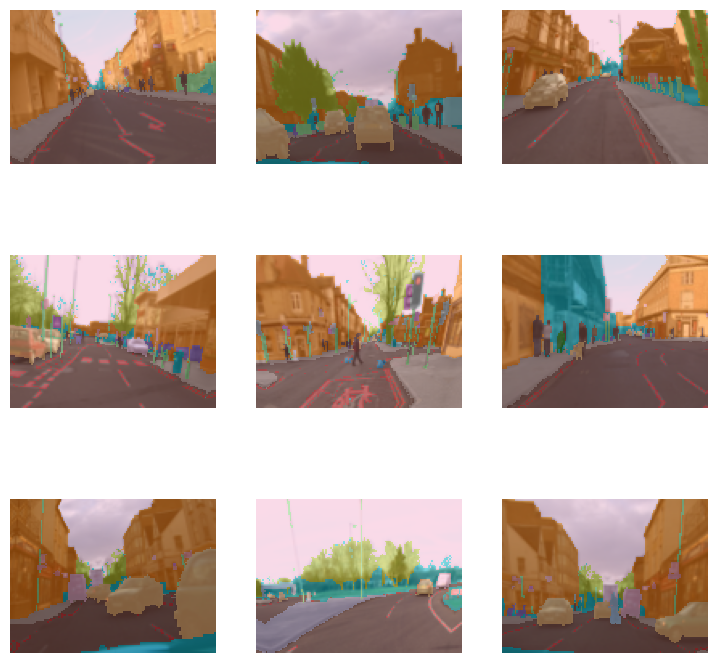

In [58]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes = np.loadtxt(path/'codes.txt', dtype=str))),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    batch_tfms=aug_transforms())

dls = camvid.dataloaders(path/"images")
dls.show_batch()

### Points
For this example we will use a small sample of the BiWi kinect head pose dataset. It contains pictures of people and the task is to predict where the center of their head is. We have saved this small dataet with a dictionary filename to center:

In [59]:
biwi_source = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = load_pickle(biwi_source/'centers.pkl')

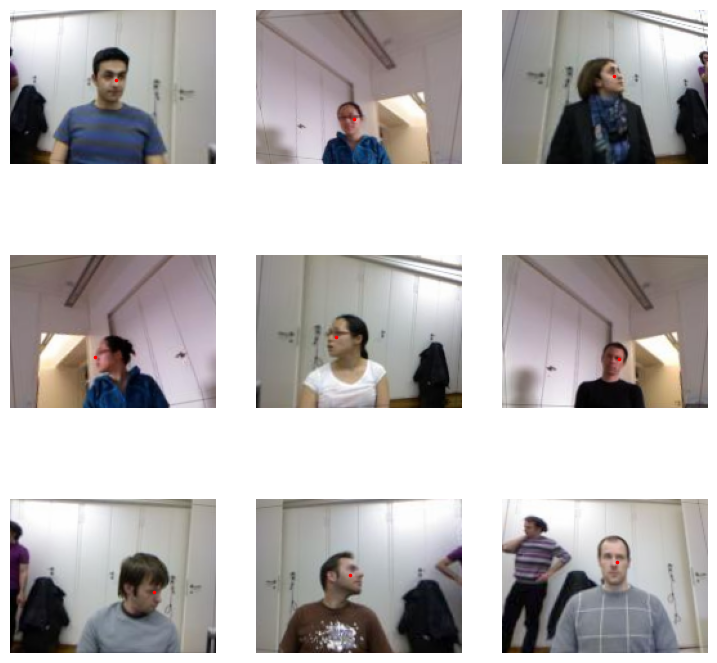

In [60]:
biwi = DataBlock(blocks=(ImageBlock, PointBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=lambda o:fn2ctr[o.name].flip(0),
                 batch_tfms=aug_transforms())

dls = biwi.dataloaders(biwi_source)
dls.show_batch(max_n=9)

### Bounding boxes
For this task, we will use a small subset of the COCO dataset. It contains pictures with day-to-day objects and the goal is to predict where the objects are by drawing a rectangle around them.

The fastai library comes with a function called get_annotations that will interpret the content of train.json and give us a dictionary filename to (bounding boxes, labels).

In [63]:
coco_source = untar_data(URLs.COCO_TINY)
images, lbl_bbox = get_annotations(coco_source/'train.json')
img2bbox = dict(zip(images, lbl_bbox))

Then we can go over our usual questions:

- what are the types of our inputs and targets? Images and bounding boxes.
- where is the data? In subfolders.
- how do we know if a sample is in the training or the validation set? We’ll take a random split.
- how do we know the label of an image? By using the img2bbox dictionary.
- do we want to apply a function to a given sample? Yes, we need to resize everything to a given size.
- do we want to apply a function to a batch after it’s created? Yes, we want data augmentation.

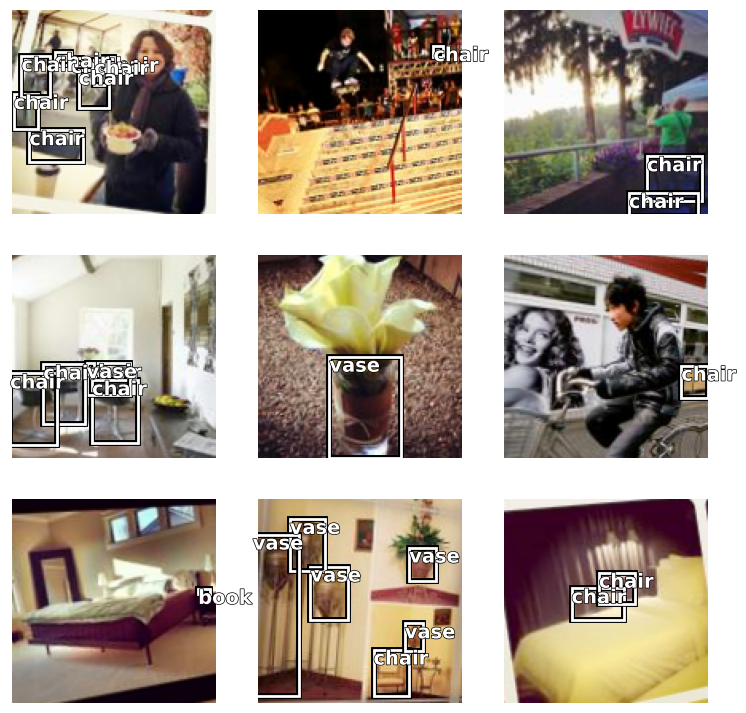

In [64]:
coco = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=[lambda o: img2bbox[o.name][0], lambda o: img2bbox[o.name][1]],
                 item_tfms=Resize(128),
                 batch_tfms=aug_transforms(),
                 n_inp=1)

dls = coco.dataloaders(coco_source)
dls.show_batch(max_n=9)

Note that we provide three types, because we have two targets: the bounding boxes and the labels. That’s why we pass n_inp=1 at the end, to tell the library where the inputs stop and the targets begin.

This is also why we pass a list to get_y: since we have two targets, we must tell the library how to label for each of them (you can use noop if you don’t want to do anything for one).

## Tabular data

In [65]:
from fastai.tabular.core import *

In [66]:
adult_source = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(adult_source/'adult.csv')
df.head()

age          workclass  fnlwgt     education  education-num  \
0   49            Private  101320    Assoc-acdm           12.0   
1   44            Private  236746       Masters           14.0   
2   38            Private   96185       HS-grad            NaN   
3   38       Self-emp-inc  112847   Prof-school           15.0   
4   42   Self-emp-not-inc   82297       7th-8th            NaN   

        marital-status        occupation    relationship                 race  \
0   Married-civ-spouse               NaN            Wife                White   
1             Divorced   Exec-managerial   Not-in-family                White   
2             Divorced               NaN       Unmarried                Black   
3   Married-civ-spouse    Prof-specialty         Husband   Asian-Pac-Islander   
4   Married-civ-spouse     Other-service            Wife                Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country salary  
0   Female             0          1902              40   United-States  >=50k  
1     Male         10520             0              45   United-States  >=50k  
2   Female             0             0              32   United-States   <50k  
3     Male             0             0              40   United-States  >=50k  
4   Female             0             0              50   United-States   <50k

In [67]:
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [Categorify, FillMissing, Normalize]
splits = RandomSplitter()(range_of(df))

to = TabularPandas(df, procs, cat_names, cont_names, y_names="salary", splits=splits, y_block=CategoryBlock)
dls = to.dataloaders()
dls.show_batch()

# Training Imagenette
A dive into the layered API of fastai in computer vision

# Mid-tier data API - Pets
Using Datasets, Pipeline, TfmdLists and Transform in computer vision

# Chest X-ray model
In this tutorial we will build a classifier that distinguishes between chest X-rays with pneumothorax and chest X-rays without pneumothorax. The image data is loaded directly from the DICOM source files, so no prior DICOM data handling is needed. This tutorial also goes through what DICOM images are and review at a high level how to evaluate the results of the classifier.

# Transformers
An example of how to incorporate the transfomers library from HuggingFace with fastai

# Notebook distributed training
Using Accelerate to launch a training script from your notebook